In [77]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from pandas.plotting import lag_plot,autocorrelation_plot
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import MarkerCluster
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,Dropout

sns.set_style("darkgrid")
os.chdir("/home/sadil/Data Science Projects/COVID-19")

In [78]:
conf_link="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_link="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
reco_link="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

In [79]:
confirmed=pd.read_csv(conf_link,parse_dates=[0])
death=pd.read_csv(death_link,parse_dates=[0])
recovered=pd.read_csv(reco_link,parse_dates=[0])

In [80]:
confirmed.columns=['State','Country','Lat','Long']+list(confirmed.columns)[4:]
death.columns=['State','Country','Lat','Long']+list(death.columns)[4:]
recovered.columns=['State','Country','Lat','Long']+list(recovered.columns)[4:]

In [313]:
china_confirmed=confirmed[confirmed['Country']=='China'].iloc[:,4:].sum(axis=0)
china_recovered=recovered[recovered['Country']=='China'].iloc[:,4:].sum(axis=0)


usa_confirmed=confirmed[confirmed['Country']=='US'].iloc[:,4:].sum(axis=0)
usa_recovered=recovered[recovered['Country']=='US'].iloc[:,4:].sum(axis=0)

spain_confirmed=confirmed[confirmed['Country']=='Spain'].iloc[:,4:].sum(axis=0)
spain_recovered=recovered[recovered['Country']=='Spain'].iloc[:,4:].sum(axis=0)

In [310]:
def multi(dataset):
    multiplier1=dataset[dataset>0].values[1:]
    multiplier2=dataset[dataset>0].values[:-1]

    mul=multiplier1/multiplier2
    
    return mul

# Calculating The rate

(1, 1.5)

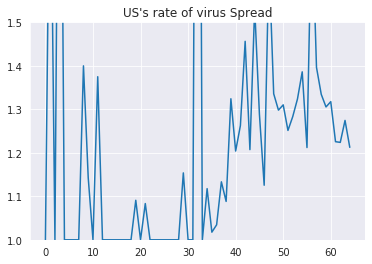

In [312]:
plt.plot(multi(usa_confirmed))
plt.title("US's rate of virus Spread")
plt.ylim(1,1.5)

(1, 1.5)

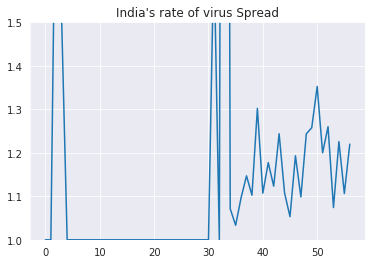

In [294]:
plt.plot(multi(india_confirmed))
plt.title("India's rate of virus Spread")
plt.ylim(1,1.5)

(1, 1.5)

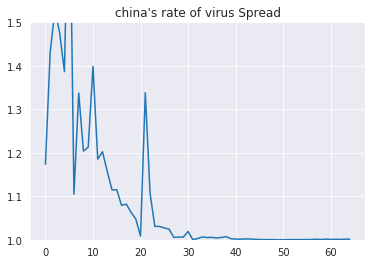

In [299]:
plt.plot(multi(china_confirmed))
plt.title("china's rate of virus Spread")
plt.ylim(1,1.5)

(1, 1.5)

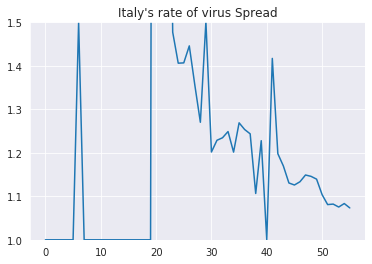

In [298]:
plt.plot(multi(italy_confirmed))
plt.title("Italy's rate of virus Spread")
plt.ylim(1,1.5)

## Initial Observations:
> For India the rate is now close to 1.22 (Calculated from the day reports were greater than 3)

> For USA the rate is close to 1.19 (Calculated from the day of first reports)

In [82]:
# So my initial hypothesis is that the rate of increase is 1.2

# Folium Map

In [83]:
country=confirmed['Country'].unique()
state=confirmed[confirmed['Country']=='China']['State'].values

In [84]:
pos=confirmed[confirmed['Country']==country[0]][['Lat','Long']].values[-1]
my_map=folium.Map()

con=confirmed[confirmed['Country']==country[0]].iloc[:,4:].sum(axis=0).values[-1]
rec=recovered[recovered['Country']==country[0]].iloc[:,4:].sum(axis=0).values[-1]
de=death[death['Country']==country[0]].iloc[:,4:].sum(axis=0).values[-1]


#folium.Marker(pos,icon=folium.Icon(color='blue'),
                #popup = f'{country[0]}\n Confirmed:{con}\n Recovered:{rec}\n Death:{de}').add_to(my_map)

    


for i in range(len(country)):
    if country[i]!='China':
        pos=confirmed[confirmed['Country']==country[i]][['Lat','Long']].values[-1]
        folium.Map(location=pos).add_to(my_map)
        con=confirmed[confirmed['Country']==country[i]].iloc[:,4:].sum(axis=0).values[-1]
        rec=recovered[recovered['Country']==country[i]].iloc[:,4:].sum(axis=0).values[-1]
        de=death[death['Country']==country[i]].iloc[:,4:].sum(axis=0).values[-1]

        if con>10000:
            folium.Marker(pos,icon=folium.Icon(color='red'),
                          popup = f'{country[i]}\n Confirmed:{con}\n Recovered:{rec}\n Death:{de}').add_to(my_map)
        elif con>1000:
            folium.Marker(pos,icon=folium.Icon(color='orange'),
                          popup = f'{country[i]}\n Confirmed:{con}\n Recovered:{rec}\n Death:{de}').add_to(my_map)
        else:
            folium.Marker(pos,icon=folium.Icon(color='blue'),
                          popup = f'{country[i]}\n Confirmed:{con}\n Recovered:{rec}\n Death:{de}').add_to(my_map)
    else:
        for j in range(len(state)):
            pos=confirmed[confirmed['State']==state[j]][['Lat','Long']].values[-1]
            folium.Map(location=pos).add_to(my_map)
            con=confirmed[confirmed['State']==state[j]].iloc[:,4:].sum(axis=0).values[-1]
            rec=recovered[recovered['State']==state[j]].iloc[:,4:].sum(axis=0).values[-1]
            de=death[death['State']==state[j]].iloc[:,4:].sum(axis=0).values[-1]

            if con>10000:
                folium.Marker(pos,icon=folium.Icon(color='red'),
                              popup = f'Province:{state[j]} (China)\n Confirmed:{con}\n Recovered:{rec}\n Death:{de}').add_to(my_map)
            elif con>1000:
                folium.Marker(pos,icon=folium.Icon(color='orange'),
                              popup = f'Province:{state[j]} (China)\n Confirmed:{con}\n Recovered:{rec}\n Death:{de}').add_to(my_map)
            else:
                folium.Marker(pos,icon=folium.Icon(color='blue'),
                              popup = f'Province:{state[j]} (China)\n Confirmed:{con}\n Recovered:{rec}\n Death:{de}').add_to(my_map)
    


In [85]:
my_map

In [12]:
my_map.save('corona_country.html')

# Cases of Italy

In [86]:
italy_confirmed=confirmed[confirmed['Country']=='Italy'].iloc[:,4:].sum(axis=0)
italy_recovered=recovered[recovered['Country']=='Italy'].iloc[:,4:].sum(axis=0)

Text(0.5, 1.0, 'China vs Italy Confirmed Cases')

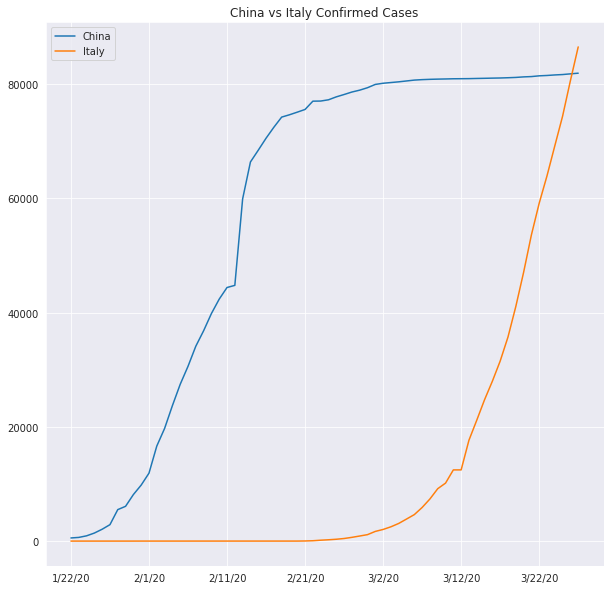

In [87]:
plt.figure(figsize=(10,10))
china_confirmed.plot()
italy_confirmed.plot()
plt.legend(['China','Italy'])
plt.title("China vs Italy Confirmed Cases")

(0, 110000)

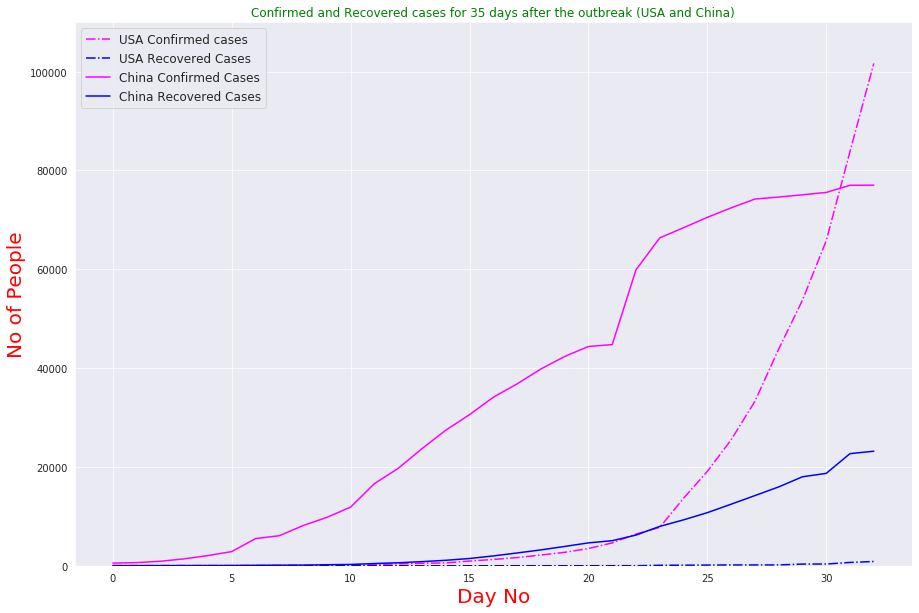

In [88]:
plt.figure(figsize=(15,10))
# Plot
plt.plot(list(range(33)),usa_confirmed.iloc[33:],color='magenta',linestyle='-.')
plt.plot(list(range(33)),usa_recovered.iloc[33:],color='blue',linestyle='-.')
plt.plot(list(range(33)),china_confirmed.iloc[:33],color='magenta')
plt.plot(list(range(33)),china_recovered.iloc[:33],color='blue')


plt.xlabel("Day No",color='red',fontsize=20)
plt.ylabel("No of People",color='red',fontsize=20)
           
plt.legend(['USA Confirmed cases','USA Recovered Cases',
           "China Confirmed Cases",'China Recovered Cases'],fontsize='large')
plt.title("Confirmed and Recovered cases for 35 days after the outbreak (USA and China)",color='green')
plt.ylim(0,110000)

(0, 90000)

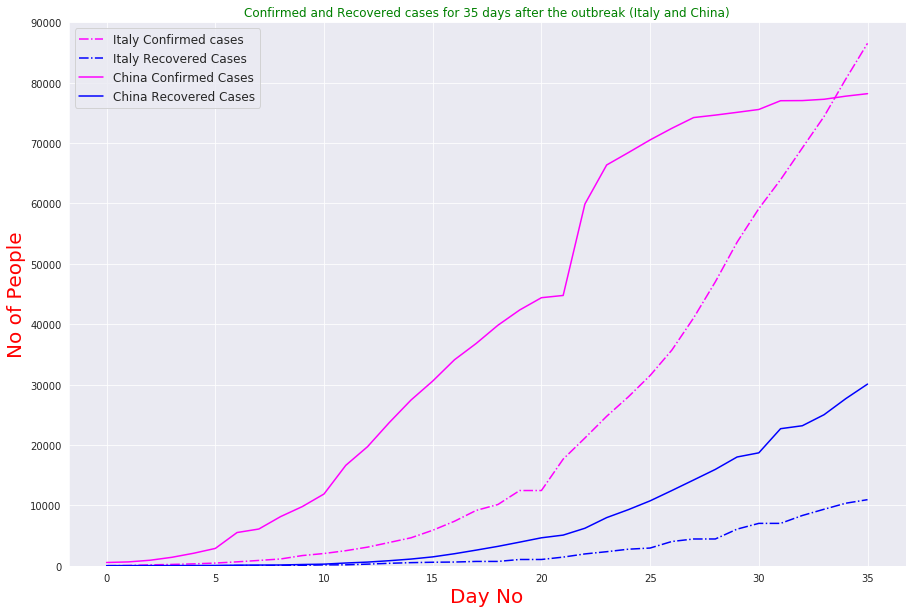

In [89]:
plt.figure(figsize=(15,10))
y=italy_recovered.iloc[30:]

# Plot
plt.plot(list(range(36)),italy_confirmed.iloc[30:],color='magenta',linestyle='-.')
plt.plot(list(range(36)),italy_recovered.iloc[30:],color='blue',linestyle='-.')
plt.plot(list(range(36)),china_confirmed.iloc[:36],color='magenta')
plt.plot(list(range(36)),china_recovered.iloc[:36],color='blue')


plt.xlabel("Day No",color='red',fontsize=20)
plt.ylabel("No of People",color='red',fontsize=20)
           
plt.legend(['Italy Confirmed cases','Italy Recovered Cases',
           "China Confirmed Cases",'China Recovered Cases'],fontsize='large')
plt.title("Confirmed and Recovered cases for 35 days after the outbreak (Italy and China)",color='green')
plt.ylim(0,90000)

Text(0.5, 1.0, 'Italy Confirmed Cases')

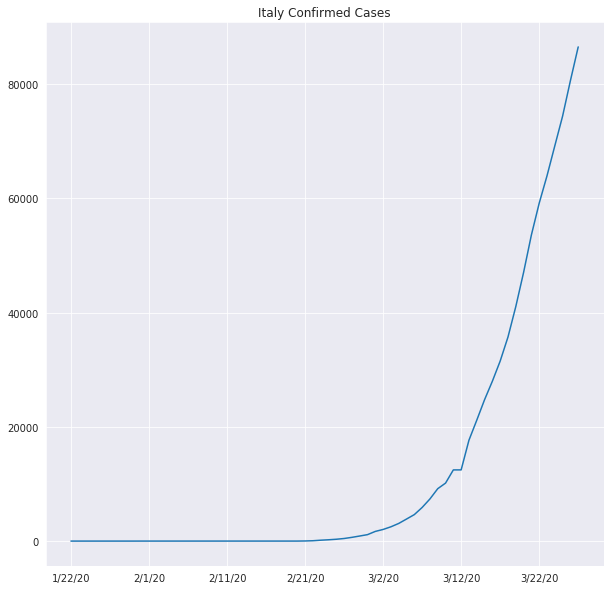

In [90]:
plt.figure(figsize=(10,10))
italy_confirmed.plot()
plt.title('Italy Confirmed Cases')

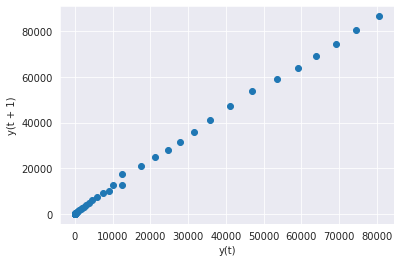

In [91]:
lag_plot(italy_confirmed)

# Cases of India

In [92]:
india_confirmed=confirmed[confirmed['Country']=='India'].iloc[:,4:].sum(axis=0)

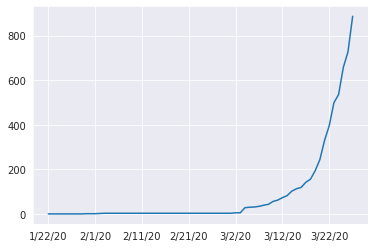

In [93]:
india_confirmed.plot()

In [94]:
m1=multi(china_confirmed,20)
m2=multi(india_confirmed,20)

Text(0.5, 1.0, 'The times cases increase from previous date')

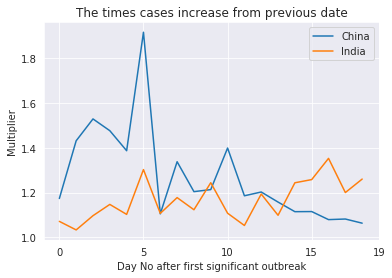

In [95]:
sns.lineplot(list(range(19)),m1)
sns.lineplot(list(range(19)),m2)
plt.xticks([0,5,10,15,19])
plt.xlabel('Day No after first significant outbreak')
plt.ylabel('Multiplier')
plt.legend(["China",'India'])
plt.title('The times cases increase from previous date')

Text(0.5, 1.0, 'Autocorrelation Plot')

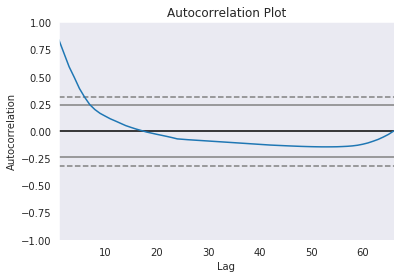

In [96]:
autocorrelation_plot(india_confirmed)
plt.title('Autocorrelation Plot')

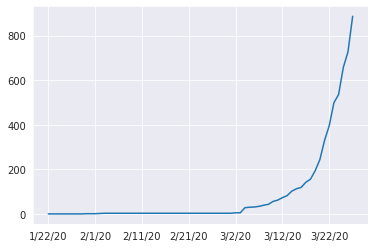

In [97]:
india_confirmed.plot()

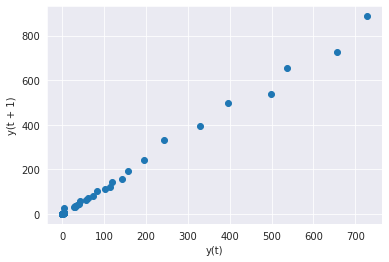

In [98]:
lag_plot(india_confirmed)

# Autoregression

In [99]:
def model_ar(dataset,t_s1,t_s2):
    model=AR(dataset[:t_s1])
    model=model.fit()
    
    predict=model.predict(t_s1,t_s2)
    
    #Plotting
    plt.plot(predict.values)
    plt.plot(dataset[t_s1:].values)
    plt.legend(['Predicted','Actual'])
    
    
    # Evaluation
    print(f'RMSE Score:{np.sqrt(mean_squared_error(dataset[t_s1:],predict))}')

RMSE Score:64463.23638733684


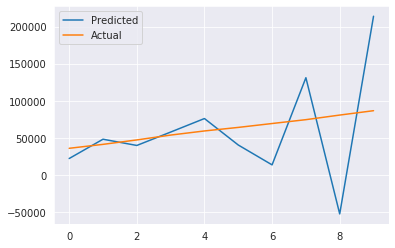

In [100]:
model_ar(italy_confirmed,56,len(india_confirmed)-1)

# Moving Average

In [101]:
def model_ma(dataset,t_s1,t_s2):
    model=ARMA(dataset[:t_s1],order=(0,1)).fit(disp=False)
    
    predict=model.predict(t_s1,t_s2)
    
    #Plotting
    plt.plot(predict.values)
    plt.plot(dataset[t_s1:].values)
    plt.legend(['Predicted','Actual'])
    
    # Evaluation
    print(f'RMSE Score:{np.sqrt(mean_squared_error(dataset[t_s1:],predict))}')

RMSE Score:497.9990204301099


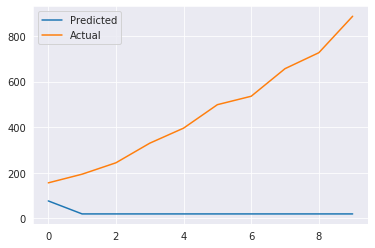

In [102]:
model_ma(india_confirmed,56,len(india_confirmed)-1)

# LSTM model

In [116]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X,dtype=np.float32), np.array(y,dtype=np.float32)
n_steps=1
x,y=split_sequence(india_confirmed,n_steps)

In [117]:
x_train=x.copy()
x_train.resize((x_train.shape[0],x_train.shape[1],1))
"""x_test=x[-6:].copy()
x_test.resize((x_test.shape[0],x_test.shape[1],1))"""
y_train=y.copy()
#y_test=y[-6:]


## LSTM

In [142]:
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu',return_sequences=True, input_shape=(n_steps,1)))
model_lstm.add(LSTM(128,activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse',learning_rate=0.01,momentum=0.9)

history=model_lstm.fit(x_train,y_train,epochs=100,verbose=0)


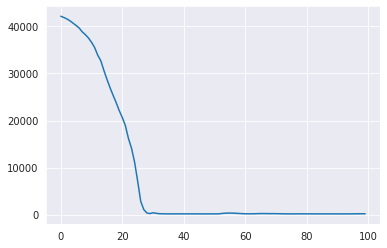

In [145]:
plt.plot(history.epoch,history.history['loss'])

('28-3-20', 1050.3867)
('29-3-20', 1262.0939)
('30-3-20', 1516.1813)
('31-3-20', 1821.1337)
('1-4-20', 2187.1333)
('2-4-20', 2626.4016)
('3-4-20', 3153.6057)
('4-4-20', 3786.3486)
('5-4-20', 4545.7583)
('6-4-20', 5457.192)
('7-4-20', 6551.083)
('8-4-20', 7863.9565)
('9-4-20', 9439.65)
('10-4-20', 11330.777)
('11-4-20', 13600.483)
('12-4-20', 16324.556)
('13-4-20', 19593.95)
('14-4-20', 23517.834)
('15-4-20', 28227.229)
('16-4-20', 33879.383)
('17-4-20', 40663.023)
('18-4-20', 48804.656)
('19-4-20', 58576.15)
('20-4-20', 70303.76)
('21-4-20', 84379.08)
('22-4-20', 101272.086)
('23-4-20', 121546.85)
('24-4-20', 145880.36)
('25-4-20', 175085.14)
('26-4-20', 210136.31)
('27-4-20', 252204.27)
RMSE Score:13.331692695617676


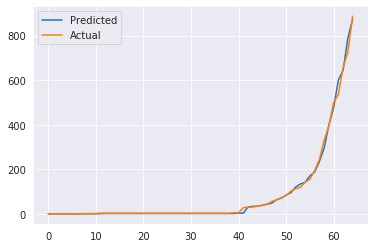

In [148]:
predict=model_lstm.predict(x_train)

#Plotting
forecast=[]
temp=predict[-1].reshape(1,1,1)
dates=[]
for i in range(28,59):
    temp_pred=model_lstm.predict(temp)
    if i>31:
        print((f'{i%31}-4-20',temp_pred[0][0]))
        dates.append(f'{i%31}-4-20')
        forecast.append(temp_pred[0][0])
    else:
        print((f'{i}-3-20',temp_pred[0][0]))
        dates.append(f'{i%31}-4-20')
        forecast.append(temp_pred[0][0])
    temp=temp_pred.reshape(1,1,1)

plt.plot(predict)
plt.plot(y_train)
plt.legend(['Predicted','Actual'])

# Evaluation
print(f'RMSE Score:{np.sqrt(mean_squared_error(y_train,predict))}')

# Bidirectional LSTM

In [163]:
model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu',return_sequences=True), input_shape=(n_steps, 1)))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',learning_rate=0.01,momentum=0.99)
    
history=model.fit(x_train,y_train,epochs=100,verbose=0)    

(0, 1000)

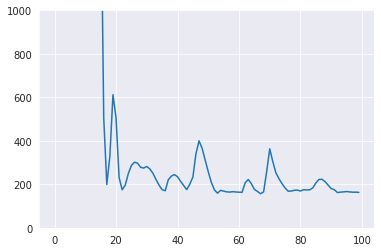

In [164]:
plt.plot(history.epoch,history.history['loss'])
plt.ylim(0,1000)

('28-3-20', 1027.1763)
('29-3-20', 1220.6158)
('30-3-20', 1450.2839)
('31-3-20', 1722.9672)
('1-4-20', 2046.7223)
('2-4-20', 2431.1143)
('3-4-20', 2887.5)
('4-4-20', 3429.3643)
('5-4-20', 4072.7153)
('6-4-20', 4836.5615)
('7-4-20', 5743.47)
('8-4-20', 6820.2373)
('9-4-20', 8098.675)
('10-4-20', 9616.555)
('11-4-20', 11418.724)
('12-4-20', 13558.427)
('13-4-20', 16098.881)
('14-4-20', 19115.143)
('15-4-20', 22696.33)
('16-4-20', 26948.25)
('17-4-20', 31996.523)
('18-4-20', 37990.305)
('19-4-20', 45106.68)
('20-4-20', 53555.902)
('21-4-20', 63587.6)
('22-4-20', 75498.164)
('23-4-20', 89639.5)
('24-4-20', 106429.41)
('25-4-20', 126363.945)
('26-4-20', 150032.08)
('27-4-20', 178133.08)
RMSE Score:12.799697875976562


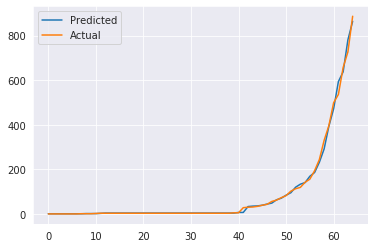

In [165]:
predict=model.predict(x_train)


forecast_bilstm=[]
dates_bilstm=[]
temp=predict[-1].reshape(1,1,1)
for i in range(28,59):
    temp_pred=model.predict(temp)
    if i>31:
        print((f'{i%31}-4-20',temp_pred[0][0]))
        dates_bilstm.append(f'{i%31}-4-20')
        forecast_bilstm.append(temp_pred[0][0])
    else:
        print((f'{i}-3-20',temp_pred[0][0]))
        dates_bilstm.append(f'{i%31}-4-20')
        forecast_bilstm.append(temp_pred[0][0])
    temp=temp_pred.reshape(1,1,1)

plt.plot(predict)
plt.plot(y_train)
plt.legend(['Predicted','Actual'])


# Evaluation
print(f'RMSE Score:{np.sqrt(mean_squared_error(y_train,predict))}')

In [352]:
r0_predicted=[887]
i=0
while i!=31:
    r0_predicted.append(1.2*r0_predicted[-1])
    i+=1
r0_predicted.pop(0)

887

Text(0, 0.5, 'No of People affected')

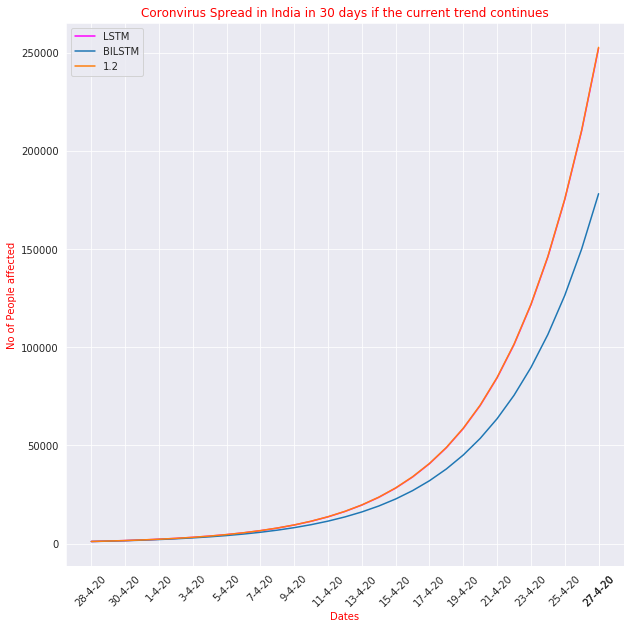

In [353]:
k=[i for i in range(0,len(dates),2)]+[-1]
dates=np.array(dates)
plt.figure(figsize=(10,10))
plt.plot(dates,forecast,color='magenta')
plt.plot(dates_bilstm,forecast_bilstm)
plt.plot(dates,r0_predicted)
plt.xticks(dates[k],rotation=45)
plt.legend(['LSTM','BILSTM','1.2'])
plt.title("Coronvirus Spread in India in 30 days if the current trend continues",color='red')
plt.xlabel("Dates",color='red')
plt.ylabel("No of People affected",color='red')

### The reason why magenta line is not showing because my lstm model and 1.2 rate model has almost same output. Check below

In [350]:
model_outputs=pd.DataFrame({'1.2_predicted':temp,'Lstm_predicted':forecast})

In [351]:
model_outputs.tail()

,1.2_predicted,Lstm_predicted
26,121847.679595,121546.851562
27,146217.215514,145880.359375
28,175460.658617,175085.140625
29,210552.790340,210136.312500
30,252663.348408,252204.265625
